# 

In [1]:
# Import packages and functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree, metrics

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [2]:
# Load the penguins data

PATH = "~/Desktop/CPSC222/A-Data/"
fin = PATH + "palmer_penguins.csv"
penguins = pd.read_csv(fin)

# Drop penguins with missing values
penguins = penguins.dropna()

# Create a new data frame with only Gentoo penguins
gentoo = penguins[penguins["species"] == "Gentoo"].copy()

# Calculate summary statistics using .describe()
#gentoo.describe(include="all")
gentoo.info()
#We need to to some massaging: first, extract bill data and sex



<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 152 to 275
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            119 non-null    object 
 1   island             119 non-null    object 
 2   bill_length_mm     119 non-null    float64
 3   bill_depth_mm      119 non-null    float64
 4   flipper_length_mm  119 non-null    float64
 5   body_mass_g        119 non-null    float64
 6   sex                119 non-null    object 
 7   year               119 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 8.4+ KB


In [3]:
#We need to to some massaging: first, extract bill data and sex.  We will see if they predict body mass
X = gentoo[["sex", "flipper_length_mm", "bill_length_mm"]]


In [4]:
#Notice that sex is a categorical variable.  You can bith see it ("male" or "female") or observe, above, that it is of type object.
#you can also do this:
gentoo.dtypes




species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [5]:
#get_dummies converts categorical variables into columns of 0/1 or T/F, so-called indicator or dummy variables
X_dummies = pd.get_dummies(X)
X_dummies

,flipper_length_mm,bill_length_mm,sex_female,sex_male
152,211.0,46.1,True,False
153,230.0,50.0,False,True
154,210.0,48.7,True,False
155,218.0,50.0,False,True
156,215.0,47.6,False,True
...,...,...,...,...
270,214.0,47.2,True,False
272,215.0,46.8,True,False
273,222.0,50.4,False,True
274,212.0,45.2,True,False


In [6]:
#See a problem?
#We can eliminate one of the columns: sex_male = False --> sex_femaile = True
X_dummies = pd.get_dummies(X, drop_first=True)  #alphabetizes the categories [sex_female, sex_male] and drops the first
print(X_dummies)


     flipper_length_mm  bill_length_mm  sex_male
152              211.0            46.1     False
153              230.0            50.0      True
154              210.0            48.7     False
155              218.0            50.0      True
156              215.0            47.6      True
..                 ...             ...       ...
270              214.0            47.2     False
272              215.0            46.8     False
273              222.0            50.4      True
274              212.0            45.2     False
275              213.0            49.9      True

[119 rows x 3 columns]


In [15]:
#Can we predict body mass from flipper lengthj, bill_length, sex
#bosy_mass_g is in the original dataset
y = gentoo["body_mass_g"]
regtreeModel = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
regtreeModel.fit(X_dummies, y);

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
# The print() statement outputs a text version of the regression tree
print(export_text(regtreeModel, feature_names=X_dummies.columns.to_list()))

|--- sex_male <= 0.50
|   |--- flipper_length_mm <= 210.50
|   |   |--- flipper_length_mm <= 207.50
|   |   |   |--- value: [4837.50]
|   |   |--- flipper_length_mm >  207.50
|   |   |   |--- value: [4436.25]
|   |--- flipper_length_mm >  210.50
|   |   |--- bill_length_mm <= 46.45
|   |   |   |--- value: [4760.71]
|   |   |--- bill_length_mm >  46.45
|   |   |   |--- value: [4870.00]
|--- sex_male >  0.50
|   |--- bill_length_mm <= 47.45
|   |   |--- flipper_length_mm <= 221.50
|   |   |   |--- value: [5172.73]
|   |   |--- flipper_length_mm >  221.50
|   |   |   |--- value: [5600.00]
|   |--- bill_length_mm >  47.45
|   |   |--- flipper_length_mm <= 228.50
|   |   |   |--- value: [5498.03]
|   |   |--- flipper_length_mm >  228.50
|   |   |   |--- value: [5755.00]



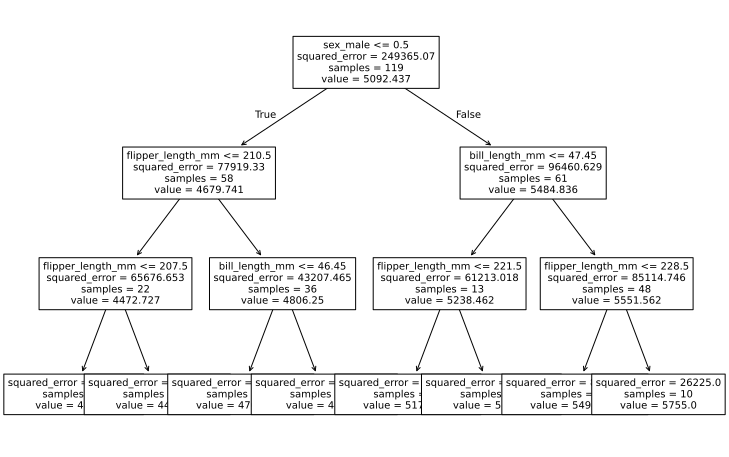

In [9]:
# Using tree.plot_tree() makes a cleaner figure (from scikitlearn)

# Resize the plotting window
plt.figure(figsize=[12, 8])

p = tree.plot_tree(
    regtreeModel,
    feature_names=X_dummies.columns,
    class_names=y.unique(),
    filled=False,
    fontsize=10)

In [10]:
# Add the predictions to the original data set
gentoo["pred"] = regtreeModel.predict(X_dummies)
gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,pred
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007,4760.714286
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007,5755.000000
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007,4436.250000
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007,5498.026316
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007,5498.026316
...,...,...,...,...,...,...,...,...,...
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009,4870.000000
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009,4870.000000
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009,5498.026316
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009,4760.714286


Text(0, 0.5, 'Predicted body mass')

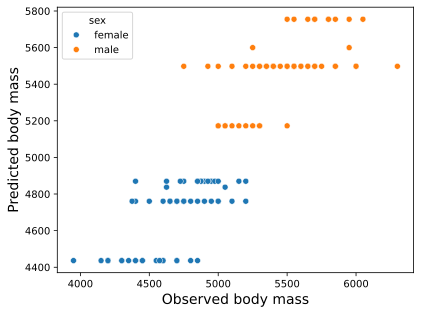

In [11]:
# Plot observed vs. predictions
p = sns.scatterplot(data=gentoo, x="body_mass_g", y="pred", hue="sex")
p.set_xlabel("Observed body mass", fontsize=14)
p.set_ylabel("Predicted body mass", fontsize=14)



In [12]:
# Why the lines?   first split is M/F.  For each sex we get one split.  The dots indicate individual items that fall within a particular
# leaf.  See the tree above. For each tree level we double the number of lines
#if the prediction were pefect, each lint would collapse to a single dot.

#Calculate MSE
#Notice the MSE drops with increased splits
mse = (metrics.mean_squared_error(gentoo["pred"], y))  # This is the sum of the squares of observed y - predicted y. 
rmse = np.sqrt(mse)
avg = gentoo["body_mass_g"].mean()	
print("average prediction error = " + str(rmse/avg))

average prediction error = 0.04643000243855247


In [13]:
r2 = regtreeModel.score(X_dummies, y)
r2

0.7758116090318262

In [14]:
#Conclusion 78% of the variance is explained by three variables and average precition error is small  